In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def f(z, c):
    return z**5 + c

In [40]:
# Определим функцию для оценки скорости расходимости последовательности
def divergence_speed(z, c, max_iter=100, threshold=10):
    for i in range(max_iter):
        z = f(z, c)
        if abs(z) > threshold:
            return i
    return max_iter

# Определим функцию для создания множества Жюлиа
def julia_set(c, resolution=1000, threshold=10):
    x = np.linspace(-2, 2, resolution)
    y = np.linspace(-2, 2, resolution)
    julia = np.zeros((resolution, resolution))
    
    for i in range(resolution):
        for j in range(resolution):
            z = complex(x[i], y[j])
            julia[i, j] = divergence_speed(z, c, threshold=threshold)
    
    return julia

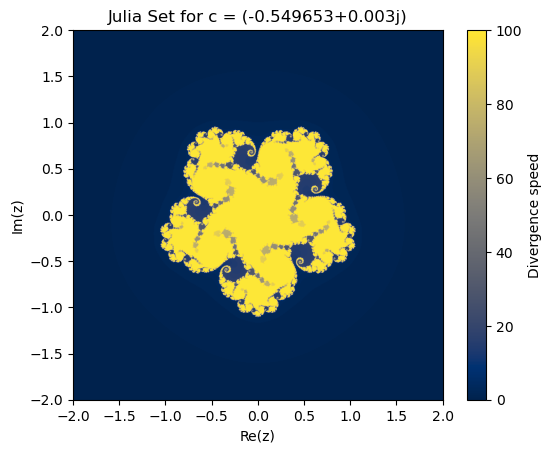

In [42]:
c = complex(- 0.549653, 0.003)
julia = julia_set(c)

plt.imshow(julia, cmap='cividis', extent=(-2, 2, -2, 2))
plt.colorbar(label='Divergence speed')
plt.title('Julia Set for c = {}'.format(c))
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

#### Для наиболее удобной визуализации результатов для различных значений константы $c$ сгенерируем GIF-изображение, задав необходимые границы для константы. Код для генерации GIF-изображения приведён ниже, само GIF-изображение залито на Git в папку с данной лабораторной, там можно ознакомиться с результатами.

In [45]:
import imageio

In [49]:
start_c = complex(-0.537493, 0.003)
end_c = complex(-0.549653, 0.003)

num_frames = 40

c_values = [start_c + (end_c - start_c) * (i / (num_frames - 1)) for i in range(num_frames)]

images = []
for c in c_values:
    julia = julia_set(c)
    
    plt.imshow(julia, cmap='cividis', extent=(-2, 2, -2, 2))
    plt.colorbar(label='Divergence speed')
    plt.title('Julia Set for c = {}'.format(c))
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    
    filename = f"julia_frame_{len(images)}.png"
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()

imageio.mimsave('julia_animation_smooth_boundary.gif', images, fps=10)

C:\Users\alena\AppData\Local\Temp\ipykernel_28440\80344962.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
